In [41]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from Environment.E_commerce import *
from Algorithms.Conv_rates_Learner import *
from Algorithms.Greedy_Learner import *
from Algorithms.TS_Learner import *
from Algorithms.UCB_Learner import *
from Algorithms.Greedy_algorithm import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
P1 = Product(0,[19.99, 21.99, 23.99, 26.99],np.multiply([0.2, 0.2, 0.2, 0.2],[19.99, 19.99, 19.99, 19.99])+[0, 21.99-19.99, 23.99-19.99, 26.99-19.99])
# t-shirt
P2 = Product(1,[29.99, 32.59, 35.99, 39.99],np.multiply([0.2, 0.2, 0.2, 0.2],[29.99, 29.99, 29.99, 29.99])+[29.99, 32.59, 35.99, 39.99]-29.99)
# shirt
P3 = Product(2,[25.99,28.99, 31.99, 34.99],np.multiply([0.3, 0.3, 0.3, 0.3],[25.99,25.99, 25.99, 25.99])+[25.99,28.99, 31.99, 34.99]-25.99)
# shorts
P4 = Product(3,[38.99,43.99,46.99, 49.99],np.multiply([0.4, 0.4, 0.4, 0.4],[38.99,38.99,38.99, 38.99])+[38.99,43.99,46.99, 49.99]-38.99)
# pants
P5 = Product(4,[79.99,89.99, 99.99, 109.99],np.multiply([0.5, 0.5, 0.5, 0.5],[79.99,79.99, 79.99, 79.99])+[79.99,89.99, 99.99, 109.99]-79.99)
# shoes


products = [P1,P2,P3,P4,P5]
margins_matrix = np.zeros((5,4))
for i in range(5):
    for j in range(4):
        margins_matrix[i,j] = products[i].margins_list[j]
E = E_commerce()
E.graph = np.array([[0. , 0.5, 0. , 1. , 0. ],[0. , 0. , 0. , 0., 0. ],[0. , 1. , 0. , 0., 0. ],[0. , 0., 1. , 0. , 0. ],[0. , 0. , 0. , 0., 0. ]])
E.set_products(products)
E.set_lambda(0.5)

Step 2

In [43]:
#matrix with the difference between prices and costs
#m_ij margins on the price j for the product i
margins_matrix = np.zeros((5,4))
for i in range(5):
    for j in range(4):
        margins_matrix[i,j] = products[i].margins_list[j]

margins = margins_matrix
#Conversion rate matrix
#in this step all conversion rates are known
#p_ij conversion rate of price j for the product i
#with higher price (j+1>j) -> lower conversion rate
p1 = np.array([0.38, 0.16, 0.15, 0.1])
p2 = np.array([0.42, 0.41, 0.18, 0.12])
p3 = np.array([0.32, 0.28, 0.17, 0.13])
p4 = np.array([0.36, 0.33, 0.25, 0.18])
p5 = np.array([0.30, 0.29, 0.22, 0.15])
C = np.array([p1,p2,p3,p4,p5])
#They are supposed to be known, but we can take their estimations from step 3
C = np.array(
[[0.97587662, 0.74469768, 0.25702704, 0.00956913],
 [0.97072909, 0.76306675, 0.1590597 , 0.00347371],
 [0.9917092 , 0.82076044, 0.21464399 ,0.00806266],
 [0.99329416, 0.72037379, 0.25835144, 0.03513267],
 [0.99600567, 0.91118628, 0.1110098,  0.00393293]])

# rewards per price
#Conversion rate matrix
#in this step all conversion rates are known
#p_ij conversion rate of price j for the product i
#with higer price (j+1>j) -> lower conversion rate
R = C*margins * np.array([[2,2,2,2],[1,1,1,1],[3,3,3,3],[3,3,3,3],[1,1,1,1]])
R

# computation of the optimal configuration
opt = 0
for i in range(5):
    opt += np.max(R[i,:])

best_arm_per_product = np.zeros(5)
for i in range(5):   
    best_arm_per_product[i] = np.argmax(np.array(E.products[i].margins_list) * C[i,:])

print("Optimal expected reward:", opt)
print("Best configuration: ", best_arm_per_product) #best arm for product i

Optimal expected reward: 134.1084979245
Best configuration:  [1. 1. 1. 0. 1.]


In [44]:
lista = Greedy_algorithm(np.array(C), np.array(margins)*np.array([[2,2,2,2],[1,1,1,1],[3,3,3,3],[3,3,3,3],[1,1,1,1]])) 
max_found = lista[0]
products_to_increase = lista[1]
rewards_per_configuration = lista[2]
max_reward_history = lista[3]
num_it = lista[4]

starting configuration:  123.13210636227001
Iterazione  1
128.85161765922
Iterazione  2
132.23979917406
Iterazione  3
133.37008308982
Iterazione  4
134.1084979245
__________________
max expected reward found:  134.1084979245
__________________
best configuration: 
1 ): 
increase price of the product 5
2 ): 
increase price of the product 3
3 ): 
increase price of the product 1
4 ): 
increase price of the product 2


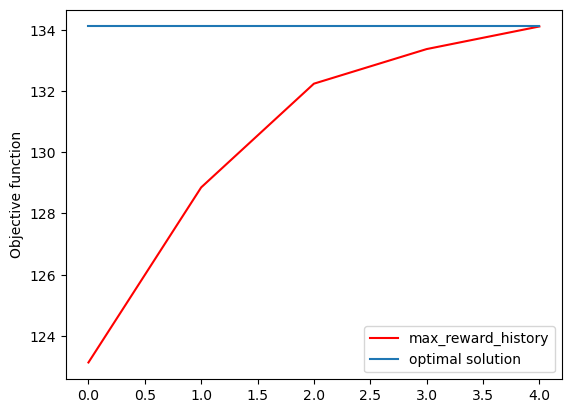

In [45]:
 #maximization of the cumulative expected margin over all the products
plt.ylabel("Objective function")
plt.plot(range(len(max_reward_history)),max_reward_history, 'r')
plt.plot(range(len(max_reward_history)),np.ones(len(max_reward_history))*opt)
plt.legend(["max_reward_history", "optimal solution"])
#in this case the greedy algorithm reached the optimal solution but it's npt always true

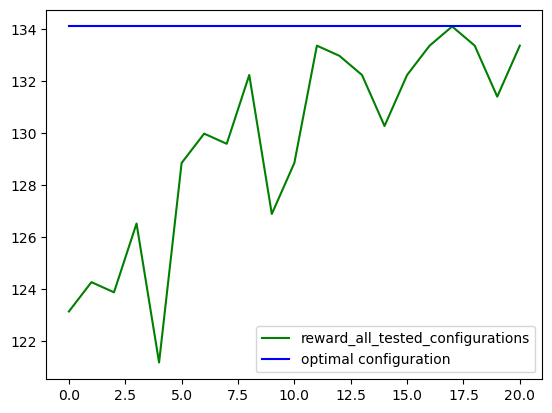

In [46]:
plt.plot(rewards_per_configuration, 'g')
plt.plot(np.ones(len(rewards_per_configuration))*opt, 'b')
plt.legend(["reward_all_tested_configurations","optimal configuration"])

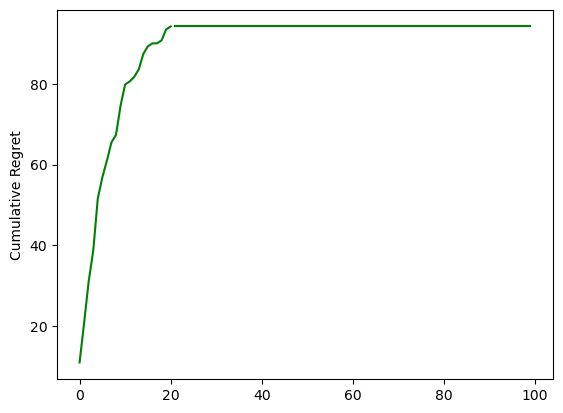

In [47]:
# If we test in each day a new configuration we get this regret (over a period of X days) and (past times we never) thi time we reach the optimal solution
plt.ylabel("Cumulative Regret")
plt.plot(np.cumsum(opt - rewards_per_configuration, axis=0), 'g')
#regret over 100 days
rewards_greedy = np.ones(100-len(rewards_per_configuration))*np.max(rewards_per_configuration)
plt.plot(range(len(rewards_per_configuration),100),np.sum(opt - rewards_per_configuration, axis=0)+np.cumsum(opt - rewards_greedy, axis=0), 'g')

Step 3

In [48]:
#Random algorithm which for each round pulls a random choice 
#to estimate asymptotically the conv_rates and the mean of the number of units sold per product,
# useful for computing clairvoyant solution and regrets of the bandit algorithms


n_arms = 4
num_users = 100
n_days = 1000
fixed_alpha = 1
fixed_weights = 1
fixed_units = 1
num_experiments = 10
opt_vector = np.zeros(num_experiments)
conv_rates_per_experiment = []
mean_units_sold_per_product_per_eperiment = []
cr_learner_expected_rewards_per_experiment = []

for e in range(num_experiments):
    env = Environment(n_arms, E, margins_matrix, num_users, fixed_alpha, fixed_weights,fixed_units)
    cr_learner = Conv_rates(n_arms=n_arms)

    for d in range(n_days):

        pulled_arm = cr_learner.pull_arm()
        reward = env.round(pulled_arm)
        cr_learner.update(pulled_arm, reward, env.clicks_current_day, env.purchases_current_day,env.daily_units)


    conversion_rates = np.zeros((5,4))
    np.set_printoptions(suppress=True)
    for i in range(5):
        conversion_rates[i] = cr_learner.beta_parameters[i][:,0]/(cr_learner.beta_parameters[i][:,0]+cr_learner.beta_parameters[i][:,1])
        opt_vector[e] += np.max(np.array(E.products[i].margins_list) * conversion_rates[i] * cr_learner.lambda_poisson[i])

    conv_rates_per_experiment.append(conversion_rates)
    mean_units_sold_per_product_per_eperiment.append(cr_learner.lambda_poisson)
    cr_learner_expected_rewards_per_experiment.append(cr_learner.expected_rewards)

#optimal expected clarvoyant solution is given chosing each round the best combination
opt = np.mean(opt_vector) #+ np.std(opt_vector)
best_arm_per_product = np.zeros(5)
for i in range(5):   
    best_arm_per_product[i] = np.argmax(np.array(E.products[i].margins_list) * np.mean(conv_rates_per_experiment,axis=0)[i] 
                                        * np.mean(mean_units_sold_per_product_per_eperiment, axis = 0)[i])
    
print("_______________________________________________")
print("Conversion rates")
print(np.mean(conv_rates_per_experiment,axis=0))
print("_______________________________________________")
print("Expected rewards per arm")
print(np.mean(cr_learner_expected_rewards_per_experiment,axis=0))
print("_______________________________________________")
print("Expected units sold per arm")
print(np.mean(mean_units_sold_per_product_per_eperiment, axis = 0))

print("_______________________________________________")
print("Best configuration", best_arm_per_product)
print("Optimal cumulative expected reward per round")
print(opt) # optimal configuration: the best combination of arms

_______________________________________________
Conversion rates
[[0.97511892 0.75303996 0.25102913 0.00792278]
 [0.97798963 0.76671012 0.16594266 0.00557889]
 [0.99249605 0.83217586 0.20998297 0.00771078]
 [0.99010966 0.72502738 0.27608122 0.04009188]
 [0.99571727 0.90306189 0.12792642 0.0039912 ]]
_______________________________________________
Expected rewards per arm
[[ 7.82686512  9.05815129  3.98341358  0.08703964]
 [ 5.88423271  6.61403393  1.94975182  0.03151717]
 [23.30438009 27.0513957   8.64211364  0.21905031]
 [46.4721853  44.66790939 19.38106581  2.95542286]
 [39.97943774 45.31290384  7.4964538   0.        ]]
_______________________________________________
Expected units sold per arm
[[2.  2.  2.  1.2]
 [1.  1.  1.  0.5]
 [3.  3.  3.  2.4]
 [3.  3.  3.  3. ]
 [1.  1.  1.  0. ]]
_______________________________________________
Best configuration [1. 1. 1. 0. 1.]
Optimal cumulative expected reward per round
134.273142463203


In [49]:
#Comparison between TS and UCB

n_arms = 4
num_users = 100
n_days = 365
fixed_alpha = 1
fixed_weights = 1
fixed_units = 1
n_experiments = 10

ts_rewards_per_experiment = []
ucb_rewards_per_experiment = []
gr_rewards_per_experiment = []
cr_rewards_per_experiment = []

ts_pulls_per_arm_per_experiment = []
ucb_pulls_per_arm_per_experiment = []


for e in range(n_experiments):

    env = Environment(n_arms, E, margins_matrix, num_users, fixed_alpha,fixed_weights,fixed_units)
    gr_learner = Greedy(n_arms=n_arms)
    ucb_learner = UCB(n_arms=n_arms)
    ts_learner = TS(n_arms=n_arms)
    cr_learner = Conv_rates(n_arms=n_arms)

    for d in range(n_days):

        pulled_arm = cr_learner.pull_arm(env.margins_matrix)
        reward = env.round(pulled_arm)
        cr_learner.update(pulled_arm, reward, env.clicks_current_day, env.purchases_current_day,env.daily_units)

        pulled_arm = gr_learner.pull_arm(env.margins_matrix)
        reward = env.round(pulled_arm)
        gr_learner.update(pulled_arm, reward, env.clicks_current_day, env.purchases_current_day)  

        pulled_arm = ucb_learner.pull_arm()
        reward = env.round(pulled_arm)
        ucb_learner.update(pulled_arm, reward)
        
        pulled_arm = ts_learner.pull_arm(env.margins_matrix)
        reward = env.round(pulled_arm)
        ts_learner.update(pulled_arm, reward, env.clicks_current_day, env.purchases_current_day, env.daily_units)

    ts_rewards_per_experiment.append(ts_learner.collected_rewards)
    ucb_rewards_per_experiment.append(ucb_learner.collected_rewards)
    gr_rewards_per_experiment.append(gr_learner.collected_rewards)
    cr_rewards_per_experiment.append(cr_learner.collected_rewards)

    ts_pulls_per_arm_per_experiment.append(ts_learner.counter_per_arm)
    ucb_pulls_per_arm_per_experiment.append(ucb_learner.counter_per_arm)


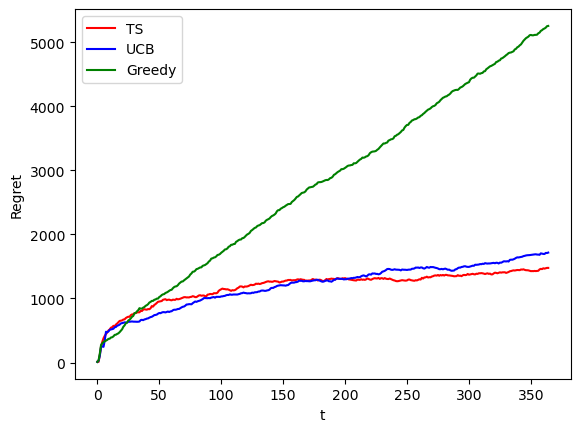

In [50]:
plt.figure(0)
plt.xlabel("t")
plt.ylabel("Regret")
plt.plot(np.cumsum(np.mean(opt - ts_rewards_per_experiment, axis=0)), 'r')
plt.plot(np.cumsum(np.mean(opt - ucb_rewards_per_experiment, axis=0)), 'b')
plt.plot(np.cumsum(np.mean(opt - gr_rewards_per_experiment, axis=0)), 'g')
plt.legend(["TS","UCB", "Greedy"])
plt.show()